<a href="https://colab.research.google.com/github/NavyaSri-2001/Natural-Language-Processing-Projects/blob/main/Natural_Language_Processing_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import nltk

In [8]:
messages = [line.rstrip() for line in open('/content/SMSSpamCollection')]
print(len(messages))

5574


In [7]:
'''
for line in open('/content/SMSSpamCollection'):
  print(line)
'''

Streaming output truncated to the last 5000 lines.
ham	Somebody should go to andros and steal ice

ham	Don know. I did't msg him recently.

ham	Take us out shopping and Mark will distract Isaiah.=D

ham	Mum, hope you are having a great day. Hoping this text meets you well and full of life. Have a great day. Abiola

ham	There is no sense in my foot and penis.

ham	Okay but i thought you were the expert

ham	*deep sigh* ... I miss you :-( ... I am really surprised you haven't gone to the net cafe yet to get to me ... Don't you miss me?

ham	S.s:)i thinl role is like sachin.just standing. Others have to hit.

ham	Have a great trip to India. And bring the light to everyone not just with the project but with everyone that is lucky to see you smile. Bye. Abiola

ham	And very importantly, all we discuss is between u and i only.

ham	K..k:)how about your training process?

ham	Ok lor. I ned 2 go toa payoh 4 a while 2 return smth u wan 2 send me there or wat?

ham	In da car park 

ham	I wish th

In [9]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [12]:
for message_no, message in enumerate(messages[:10]):
  print(message_no, message)
  print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [13]:
import pandas as pd

In [15]:
messages =pd.read_csv('/content/SMSSpamCollection', sep='\t', names=['labels', 'message'])
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [18]:
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [21]:
messages['length']=messages['message'].apply(len)

In [22]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='Frequency'>

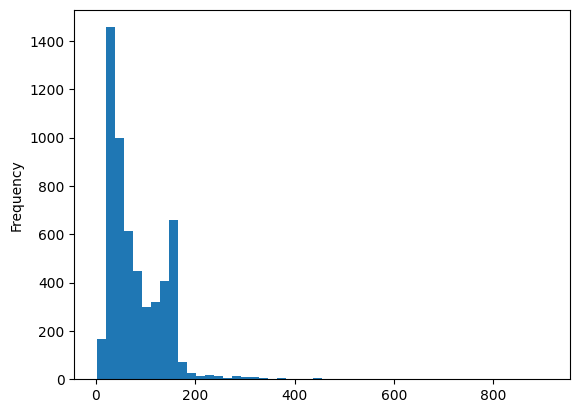

In [24]:
messages['length'].plot.hist(bins=50)

In [25]:
messages['length'].describe()
#from this we can see that max length is 910, that's why we have such large values on x-axis in above plot

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [27]:
messages[messages['length']==910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

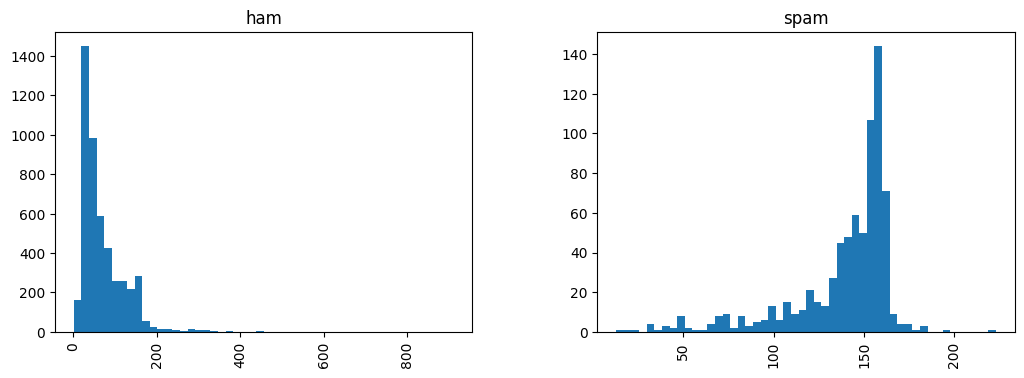

In [28]:
messages.hist(column='length', by='labels', bins=50, figsize=(12,4))

We can see that spam messages tend to have more length, since they tend to have high avg aroung 160. So we can consider length as a feature to distinguish spam and ham

**Text Pre-processing**

In [29]:
import string

In [30]:
mess='Sample message! Notice: It has punctuation.'

In [31]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
nonpunc=[c for c in mess if c not in string.punctuation]
nonpunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'I',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [40]:
from nltk.corpus import stopwords

In [42]:
#Stopwords are the words that do'nt help in classifying b/w spam and ham. They are very casual and generic words
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
nonpunc= ''.join(nonpunc)
nonpunc

'Sample message Notice It has punctuation'

In [45]:
#understanding above join function
x=['a','b','c','d']
x=''.join(x)
print(x)
x='_'.join(x)
print(x)

abcd
a_b_c_d


In [46]:
nonpunc=nonpunc.split()
nonpunc

['Sample', 'message', 'Notice', 'It', 'has', 'punctuation']

In [47]:
clean_mess= [word for word in nonpunc if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [48]:
def text_process(mess):
  '''
  1. remove punctuation
  2. remove stop words
  3. return list of clean text words
  '''
  nopunc =[char for char in mess if char not in string.punctuation]
  nopunc =''.join(nopunc)

  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

**Tokenization- It is the process that we did above. Converting text into list of clean words/tokens**

In [49]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [50]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
#Bag of words
bow_transformer= CountVectorizer(analyzer=text_process).fit(messages['message'])

In [54]:
print(len(bow_transformer.vocabulary_))

11425


In [57]:
mess4=messages['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [58]:
bow4=bow_transformer.transform([mess4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


The above shows in message 4 there a 7 unique words and 2 of them appear twice

In [59]:
print(bow4.shape)

(1, 11425)


In [70]:
#finding the words that occured twice in the above message
print(bow_transformer.get_feature_names_out()[4068])
print(bow_transformer.get_feature_names_out()[9554])

U
say


In [72]:
messages_bow= bow_transformer.transform(messages['message'])
print('Shape of Sparse Matrix :', messages_bow.shape)

Shape of Sparse Matrix : (5572, 11425)


In [73]:
messages_bow.nnz #nnz stands for non zero occurances

50548

In [74]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [77]:
from sklearn.feature_extraction.text import TfidfTransformer

In [79]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [80]:
tfidf4= tfidf_transformer.transform(bow4)

In [81]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [82]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [85]:
messages_tfidf= tfidf_transformer.transform(messages_bow)

In [86]:
from sklearn.naive_bayes import MultinomialNB

In [89]:
spam_detect_model =MultinomialNB().fit(messages_tfidf, messages['labels'])
spam_detect_model.predict(tfidf4)[0]

'ham'

In [91]:
messages['labels'][3]
#So the model predicted correctly

'ham'

In [93]:
all_pred = spam_detect_model.predict(messages_tfidf)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [94]:
from sklearn.model_selection import train_test_split

In [96]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['labels'], test_size=0.3)

In [97]:
msg_train

2116    Well I wasn't available as I washob nobbing wi...
325                        No problem. How are you doing?
4007    IM FINE BABES AINT BEEN UP 2 MUCH THO! SAW SCA...
168     Hi frnd, which is best way to avoid missunders...
3539    We are pleased to inform that your application...
                              ...                        
3468    URGENT! We are trying to contact U. Todays dra...
4093    I remain unconvinced that this isn't an elabor...
2656                    Great! I have to run now so ttyl!
1831                   That's the way you should stay oh.
4041                               I'm at home n ready...
Name: message, Length: 3900, dtype: object

In [98]:
from sklearn.pipeline import Pipeline

In [99]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer =text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [100]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7c3887e86710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [101]:
predictions = pipeline.predict(msg_test)

In [102]:
from sklearn.metrics import classification_report

In [103]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1471
        spam       1.00      0.68      0.81       201

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.96      1672

